# Quick and dirty fake muon estimation

For the case of the semileptonic ttbar decays, it is clear that there is a sizeable background contribution from multijet QCD.  The MC statistics are insufficient to derive a suitable shape so I'll see if I can produce this shape without having to resort to the full fake rate estimation.  In this case I will assume:

   * inverting the loose muon isolation requirement will yield a sample that is highly enriched in fake muons.
   * the fake rates will not make significant changes to the shape of this distribution and will mainly tell us the normalization of our isolation-inverted sample.
   * the normalization for the sample won't matter because it will be determined from the fit and we can assume that initial data/MC discrepancy is a starting point for the normalization.

In [10]:
# import and global set up
%cd '/home/naodell/work/z_plus_jpsi'
%matplotlib notebook
%pwd

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import scripts.plot_tools as pt

mpl.style.use('default')
params = {'legend.fontsize': 20,
          'axes.labelsize': 20,
          'axes.titlesize':'x-large',
          'xtick.labelsize':18,
          'ytick.labelsize':18,
         }
mpl.rcParams.update(params)
%matplotlib inline

/home/naodell/work/z_plus_jpsi


In [11]:
# get the data
# set up and get the data
features = ['lepton1_pt', 'lepton1_iso', 'lepton1_reliso']
datasets    = [
               'muon_2016B', 'muon_2016C', 'muon_2016D',
               'muon_2016E', 'muon_2016F', 'muon_2016G', 'muon_2016H',
              ]
cuts     = '25 < lepton1_pt and abs(lepton1_eta) < 2.4 and n_bjets >= 1'

dm = pt.DataManager(input_dir     = 'data/flatuples/mu4j_loose_2016',
                    dataset_names = datasets,
                    selection     = 'mu4j',
                    period        = 2016,
                    scale         = 1,
                    cuts          = cuts
                   )
df = dm.get_dataframe('data')

Loading dataframes: 100%|███████████████| 7.00/7.00 [00:03<00:00, 2.21it/s]


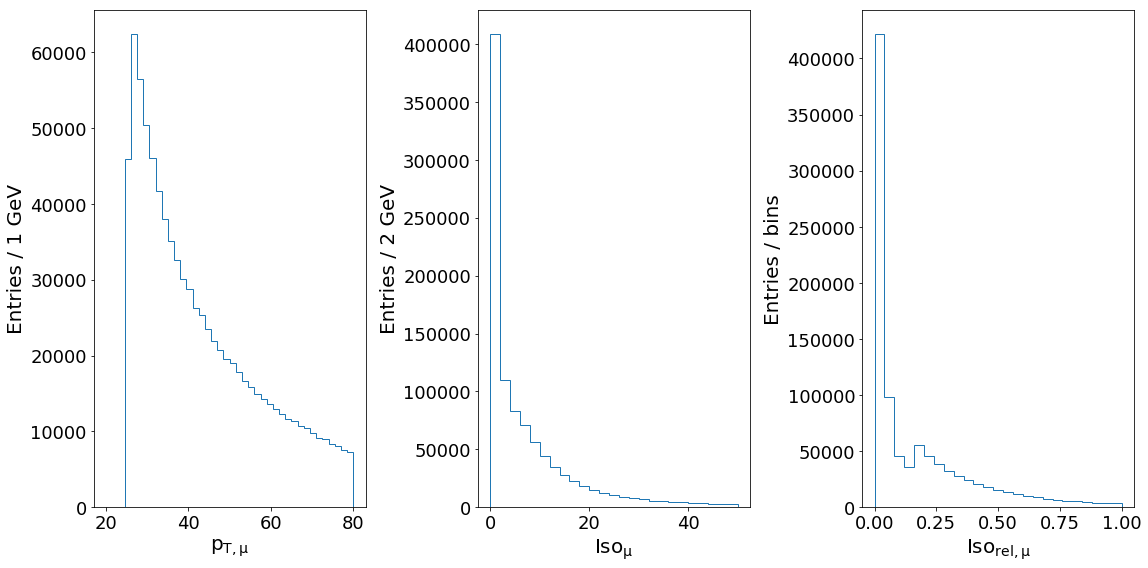

In [12]:
# no cuts
fig, axes = plt.subplots(1, 3, figsize=(16, 8), facecolor='white', tight_layout=True)

axes[0].hist(df.lepton1_pt, range=(20, 80), bins=40, histtype='step')
axes[0].set_xlabel(r'$\sf p_{T,\mu}$')
axes[0].set_ylabel('Entries / 1 GeV')

axes[1].hist(df.lepton1_iso, range=(0, 50), bins=25, histtype='step')
axes[1].set_xlabel(r'$\sf Iso_{\mu}$')
axes[1].set_ylabel('Entries / 2 GeV')

axes[2].hist(df.lepton1_reliso, range=(0, 1), bins=25, histtype='step')
axes[2].set_xlabel(r'$\sf Iso_{rel,\mu}$')
axes[2].set_ylabel('Entries / bins')

plt.show()

In [13]:
# scan relative isolation values (Michael suggested binning isolation in pt...)
scan_vals = [0., 0.15, 0.2, 0.25, np.inf]
nscans = len(scan_vals)
df_scans = [df.query(f'{scan_vals[i]} <= lepton1_reliso < {scan_vals[i+1]}') 
            for i in range(nscans-1)]

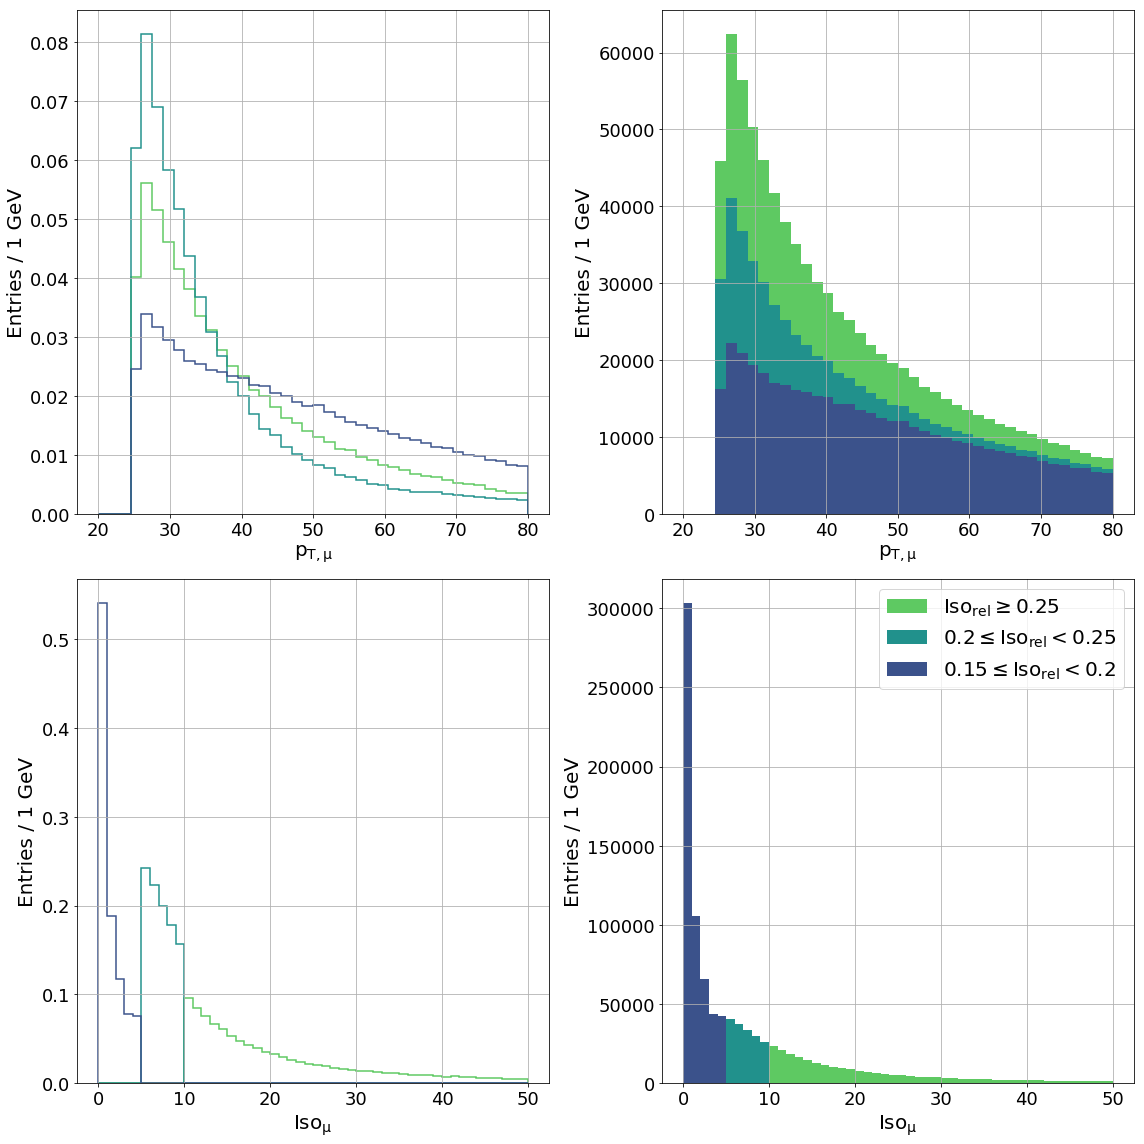

In [19]:
# scan iso rel values 
fig, axes = plt.subplots(2, 2, figsize=(16, 16), facecolor='white', tight_layout=True)

# get colors
vmap = plt.get_cmap('viridis')
vcol = [vmap((i+1)/nscans) for i in range(nscans-1)]

# muon pt
axes[0][0].hist([df_scans[i].lepton1_pt for i in range(nscans-1)], 
                range=(20, 80), 
                bins=40, 
                color=vcol,
                linewidth=1.5,
                histtype='step', 
                normed=True
               )
axes[0][0].set_xlabel(r'$\sf p_{T,\mu}$')
axes[0][0].set_ylabel('Entries / 1 GeV')
axes[0][0].grid()

axes[0][1].hist([df_scans[i].lepton1_pt for i in range(nscans-1)], 
                range=(20, 80), 
                bins=40, 
                color=vcol,
                histtype='stepfilled', 
                stacked=True
               )
axes[0][1].set_xlabel(r'$\sf p_{T,\mu}$')
axes[0][1].set_ylabel('Entries / 1 GeV')
axes[0][1].grid()

# muon isolation
axes[1][0].hist([df_scans[i].lepton1_iso for i in range(nscans-1)], 
                range=(0, 50), 
                bins=50, 
                color=vcol,
                linewidth=1.5,
                histtype='step', 
                normed=True
               )
axes[1][0].set_xlabel(r'$\sf Iso_{\mu}$')
axes[1][0].set_ylabel('Entries / 1 GeV')
axes[1][0].grid()

axes[1][1].hist([df_scans[i].lepton1_iso for i in range(nscans-1)], 
                range=(0, 50), 
                bins=50, 
                color=vcol,
                histtype='stepfilled', 
                stacked=True
               )
axes[1][1].set_xlabel(r'$\sf Iso_{\mu}$')
axes[1][1].set_ylabel('Entries / 1 GeV')
axes[1][1].grid()

plt.legend([
            r'$\sf Iso_{rel} \geq 0.25$', 
            r'$\sf 0.2  \leq Iso_{rel} < 0.25$', 
            r'$\sf 0.15 \leq Iso_{rel} < 0.2$', 
            r'$\sf 0    \leq Iso_{rel} < 0.15$', 
           ])
plt.show()

The issue with cutting on the relative isolation is it is inversely dependent on the pt and so you will tend to the muon pt distribution to lower values.  It is probably the case that we should cut on the absolute isolation.  At the very least, we can assume that the sample with relative isolation > 0.25 is likely completely dominated by fake muons.  Inspecting the lower left plot it might be sufficient to require the absolute isolation > 5 GeV to get a sample that is highly enriched in fakes, but doesn't have issues with bias of the pt distribution.

In [15]:
# scan absolute isolation values 
scan_vals = [0., 5, 10, np.inf]
nscans = len(scan_vals)
df_scans = [df.query(f'{scan_vals[i]} <= lepton1_iso < {scan_vals[i+1]}') 
            for i in range(nscans-1)]

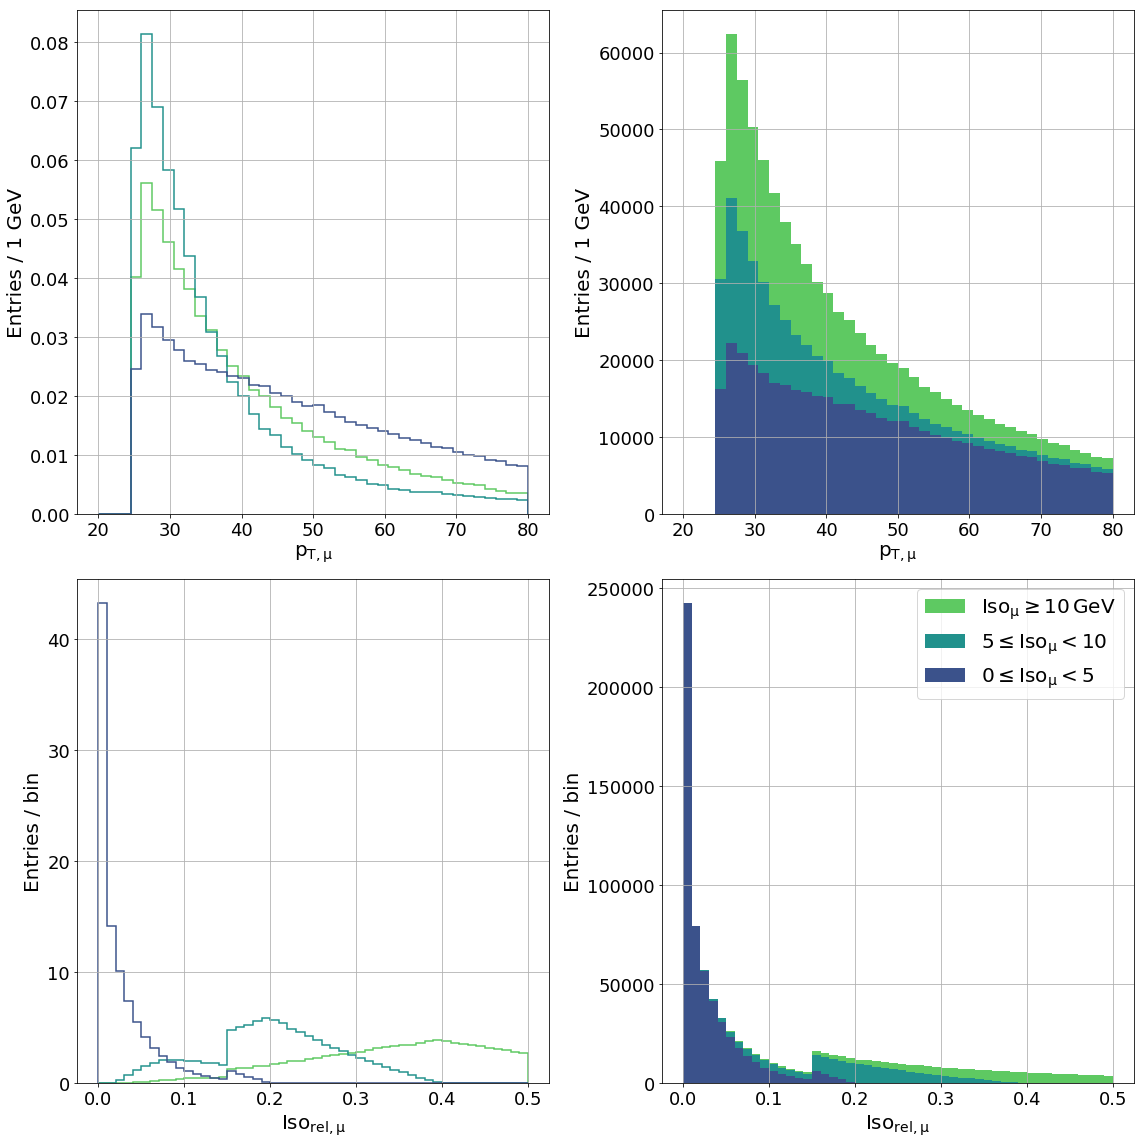

In [16]:
# plot results
fig, axes = plt.subplots(2, 2, figsize=(16, 16), facecolor='white', tight_layout=True)

# get colors
vmap = plt.get_cmap('viridis')
vcol = [vmap((i+1)/nscans) for i in range(nscans-1)]

# muon pt
axes[0][0].hist([df_scans[i].lepton1_pt for i in range(nscans-1)], 
                range=(20, 80), 
                bins=40, 
                color=vcol,
                linewidth=1.5,
                histtype='step', 
                normed=True
               )
axes[0][0].set_xlabel(r'$\sf p_{T,\mu}$')
axes[0][0].set_ylabel('Entries / 1 GeV')
axes[0][0].grid()

axes[0][1].hist([df_scans[i].lepton1_pt for i in range(nscans-1)], 
                range=(20, 80), 
                bins=40, 
                color=vcol,
                histtype='stepfilled', 
                stacked=True
               )
axes[0][1].set_xlabel(r'$\sf p_{T,\mu}$')
axes[0][1].set_ylabel('Entries / 1 GeV')
axes[0][1].grid()

# muon isolation
axes[1][0].hist([df_scans[i].lepton1_reliso for i in range(nscans-1)], 
                range=(0, 0.5), 
                bins=50, 
                color=vcol,
                linewidth=1.5,
                histtype='step', 
                normed=True
               )
axes[1][0].set_xlabel(r'$\sf Iso_{rel,\mu}$')
axes[1][0].set_ylabel('Entries / bin')
axes[1][0].grid()

axes[1][1].hist([df_scans[i].lepton1_reliso for i in range(nscans-1)], 
                range=(0, 0.5), 
                bins=50, 
                color=vcol,
                histtype='stepfilled', 
                stacked=True
               )
axes[1][1].set_xlabel(r'$\sf Iso_{rel,\mu}$')
axes[1][1].set_ylabel('Entries / bin')
axes[1][1].grid()

plt.legend([
            r'$\sf Iso_{\mu} \geq 10\,GeV$', 
            r'$\sf 5  \leq Iso_{\mu} < 10$', 
            r'$\sf 0  \leq Iso_{\mu} < 5$', 
           ])
plt.show()

In [17]:
# save the output
df = dm.get_dataframe('data')
df = df.query('lepton1_iso > 10')
df.lepton1_reliso = 0.
df.weight = 2.5e4/1e5
df = df[:100000]
df.to_pickle('data/flatuples/mu4j_test_2016/ntuple_fakes.pkl')